### Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime as dt

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List 

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

642

### Perform API Calls 

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
ok_cities = []
ok_lat = []
ok_lon = []
ok_maxtemp = []
ok_mintemp = []
ok_humidity = []
ok_clouds = []
ok_wind = []
ok_country = []
ok_date = []

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ok_cities.append(response["name"])
        ok_lat.append(response["coord"]["lat"])
        ok_lon.append(response["coord"]["lon"])
        ok_maxtemp.append(response["main"]["temp_max"])
        ok_mintemp.append(response["main"]["temp_min"])
        ok_humidity.append(response["main"]["humidity"])
        ok_clouds.append(response["clouds"]["all"])
        ok_wind.append(response["wind"]["speed"])
        ok_country.append(response["sys"]["country"])
        ok_date.append(response["dt"])
        print(f"Success! Appending {city}")
           
    except KeyError:
        print(f"Failed! No temp found for {city}")
print(response)

Success! Appending torbay
Success! Appending husavik
Success! Appending norman wells
Success! Appending batagay
Success! Appending jamestown
Success! Appending sur
Failed! No temp found for sentyabrskiy
Success! Appending sanming
Success! Appending punta arenas
Success! Appending piripiri
Success! Appending cape town
Success! Appending berlevag
Success! Appending kruisfontein
Success! Appending bathsheba
Success! Appending san patricio
Success! Appending ushuaia
Success! Appending upernavik
Success! Appending ilhabela
Success! Appending esperance
Failed! No temp found for barentsburg
Success! Appending bethel
Success! Appending sorland
Success! Appending hobart
Success! Appending dingle
Success! Appending cidreira
Success! Appending guayaramerin
Success! Appending katete
Success! Appending vostok
Success! Appending rikitea
Success! Appending inhambane
Success! Appending mar del plata
Success! Appending high prairie
Success! Appending vaini
Failed! No temp found for bolshoye polpino
Suc

Success! Appending ilheus
Success! Appending agropoli
Success! Appending haines junction
Success! Appending lipin bor
Success! Appending klaksvik
Success! Appending san quintin
Success! Appending mitsamiouli
Success! Appending te anau
Success! Appending portland
Success! Appending dikson
Success! Appending sitka
Failed! No temp found for tsienyane
Success! Appending la ronge
Success! Appending marsh harbour
Success! Appending kaabong
Success! Appending hami
Success! Appending ekhabi
Success! Appending kawalu
Success! Appending anchorage
Success! Appending shwebo
Success! Appending ganzhou
Success! Appending shenjiamen
Success! Appending huilong
Success! Appending east london
Success! Appending uray
Success! Appending lobito
Success! Appending labuan
Success! Appending sarahan
Failed! No temp found for attawapiskat
Success! Appending seoul
Success! Appending bo rai
Failed! No temp found for ciras
Success! Appending salinas
Success! Appending koltubanovskiy
Failed! No temp found for kert

Success! Appending dingli
Success! Appending tucker
Success! Appending neryungri
Success! Appending road town
Success! Appending nikolayevsk-na-amure
Success! Appending hashtrud
Success! Appending honningsvag
Success! Appending solnechnyy
Success! Appending rincon
Success! Appending nome
Success! Appending ahipara
Success! Appending umea
Success! Appending lazo
Success! Appending quthing
Success! Appending ayan
Success! Appending csenger
Success! Appending bilma
Success! Appending bullhead city
Success! Appending kenai
Success! Appending kibala
Success! Appending sao jose do belmonte
Success! Appending flinders
Success! Appending kawhia
Success! Appending borovoy
Success! Appending yumen
Success! Appending kamenka
Success! Appending ushtobe
Success! Appending moree
Success! Appending camacupa
Success! Appending magistralnyy
Success! Appending darnah
Success! Appending bac lieu
Failed! No temp found for marcona
Success! Appending arlit
Success! Appending baculin
Success! Appending oster

In [6]:
print(len(ok_cities))
print(len(ok_lat))
print(len(ok_lon))
print(len(ok_maxtemp))
print(len(ok_mintemp))
print(len(ok_humidity))
print(len(ok_clouds))
print(len(ok_wind))
print(len(ok_country))
print(len(ok_date))

592
592
592
592
592
592
592
592
592
592


### Convert Raw Data to DataFrame 

In [7]:
weather_dict = {"City": ok_cities, "Latitude": ok_lat, "Longitude": ok_lon, "Max Temp": ok_maxtemp, 
                "Humidity": ok_humidity, "Cloudiness": ok_clouds, "Wind Speed": ok_wind, 
                "Country": ok_country, "Date": ok_date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,28.99,93,90,16.11,CA,1612066840
1,Husavik,66.0449,-17.3389,15.80,73,90,8.05,IS,1612067000
2,Norman Wells,65.2820,-126.8329,-23.80,69,75,4.14,CA,1612067000
3,Batagay,67.6333,134.6333,-44.68,77,72,1.41,RU,1612067000
4,Jamestown,42.0970,-79.2353,19.40,73,90,8.05,US,1612067000
...,...,...,...,...,...,...,...,...,...
587,Sol'-Iletsk,51.1631,54.9918,17.10,96,64,5.77,RU,1612067079
588,Gerāsh,27.6652,54.1371,50.11,91,0,3.31,IR,1612067079
589,Cayenne,4.9333,-52.3333,80.60,83,75,11.50,GF,1612066793
590,Tilichiki,60.4667,166.1000,-11.34,90,93,16.71,RU,1612067080


### Inspect data and remove cities where the humidty is > 100%

In [8]:
low_hum = pd.DataFrame(weather_df[weather_df["Humidity"]< 100])
low_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,28.99,93,90,16.11,CA,1612066840
1,Husavik,66.0449,-17.3389,15.80,73,90,8.05,IS,1612067000
2,Norman Wells,65.2820,-126.8329,-23.80,69,75,4.14,CA,1612067000
3,Batagay,67.6333,134.6333,-44.68,77,72,1.41,RU,1612067000
4,Jamestown,42.0970,-79.2353,19.40,73,90,8.05,US,1612067000
...,...,...,...,...,...,...,...,...,...
587,Sol'-Iletsk,51.1631,54.9918,17.10,96,64,5.77,RU,1612067079
588,Gerāsh,27.6652,54.1371,50.11,91,0,3.31,IR,1612067079
589,Cayenne,4.9333,-52.3333,80.60,83,75,11.50,GF,1612066793
590,Tilichiki,60.4667,166.1000,-11.34,90,93,16.71,RU,1612067080


In [9]:
#https://stackoverflow.com/questions/21738566/how-to-set-a-variable-to-be-todays-date-in-python-pandas
date = dt.date.today().strftime("%m/%d/%y")
date

'01/30/21'

## Plotting the Data 

### Latitude vs. Temperature Plot 

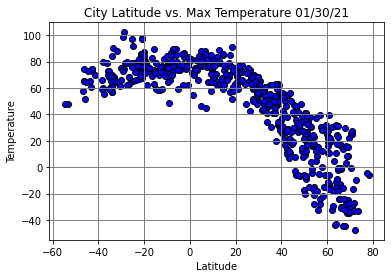

In [10]:
plot_lat = low_hum['Latitude']
plot_temp = low_hum["Max Temp"]

plt.scatter(plot_lat, plot_temp, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("output_data/maxtemp.png", dpi=150)

### Latitude vs. Humidty Plot

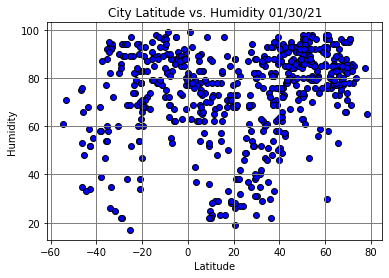

In [11]:
plot_lat = low_hum['Latitude']
plot_humidity = low_hum["Humidity"]

plt.scatter(plot_lat, plot_humidity, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/humidity.png", dpi=150)

### Latitude vs. Cloudiness Plot

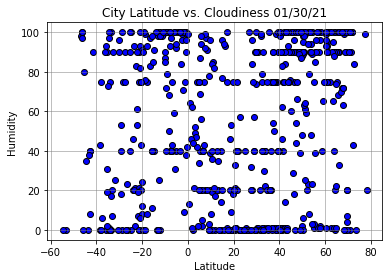

In [12]:
plot_lat = low_hum['Latitude']
plot_cloud = low_hum["Cloudiness"]

plt.scatter(plot_lat, plot_cloud, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/clouds.png", dpi=150)

###  Latitude vs. Wind Speed Plot

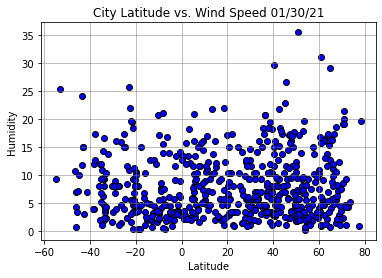

In [13]:
plot_lat = low_hum['Latitude']
plot_wind = low_hum["Wind Speed"]

plt.scatter(plot_lat, plot_wind, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/windspeed.png", dpi=150)

## Linear Regression

In [14]:
north_hem = pd.DataFrame(low_hum[low_hum["Latitude"]> 0])
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,28.99,93,90,16.11,CA,1612066840
1,Husavik,66.0449,-17.3389,15.80,73,90,8.05,IS,1612067000
2,Norman Wells,65.2820,-126.8329,-23.80,69,75,4.14,CA,1612067000
3,Batagay,67.6333,134.6333,-44.68,77,72,1.41,RU,1612067000
4,Jamestown,42.0970,-79.2353,19.40,73,90,8.05,US,1612067000


In [15]:
north_lat = north_hem["Latitude"]
north_maxtemp = north_hem["Max Temp"]
north_humid = north_hem["Humidity"]
north_cloud = north_hem["Cloudiness"]
north_wind = north_hem["Wind Speed"]

In [16]:
south_hem = pd.DataFrame(low_hum[low_hum["Latitude"]< 0])
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,Punta Arenas,-53.1500,-70.9167,48.20,71,0,25.32,CL,1612066930
8,Piripiri,-4.2733,-41.7769,73.42,91,100,0.94,BR,1612067001
9,Cape Town,-33.9258,18.4232,70.00,82,75,9.22,ZA,1612066758
11,Kruisfontein,-34.0033,24.7314,57.00,92,0,1.99,ZA,1612067001
14,Ushuaia,-54.8000,-68.3000,48.20,61,0,9.22,AR,1612066711


In [17]:
south_lat = south_hem["Latitude"]
south_maxtemp = south_hem["Max Temp"]
south_humid = south_hem["Humidity"]
south_cloud = south_hem["Cloudiness"]
south_wind = south_hem["Wind Speed"]

### Northern Hemisphere: Max Temp vs. Latitude Linear Regression
The linear regression below shows a strong negative correlation. The temperature decreases further from the equator. 

The r-value is -0.87


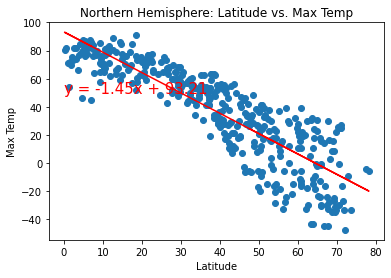

In [18]:
correlation = st.pearsonr(north_lat, north_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_maxtemp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_maxtemp)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_maxtemp.png", dpi=150)
plt.show()

### Southern Hemisphere: Max Temp vs. Latitude Linear Regression 
The linear regression below shows a postive correlation. The temperature increases closer to the equator.

The r-value is 0.35


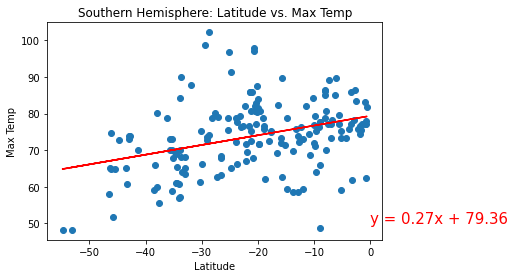

In [19]:
correlation = st.pearsonr(south_lat, south_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_maxtemp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_maxtemp)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/south_maxtemp.png", dpi=150)
plt.show()

### Northern Hemisphere: Humidty (%) vs. Latitude Linear Regression 
There is a weak postive correlation between latitude and humidity. 

The r-value is 0.4


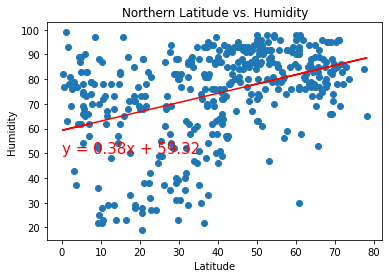

In [20]:
correlation = st.pearsonr(north_lat, north_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_humid)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_humidity.png", dpi=150)
plt.show()

### Southern Hemisphere: Humidty (%) vs. Latitude Linear Regression 
There is a weak postive correlation between latitude and humidity. 

The r-value is 0.36


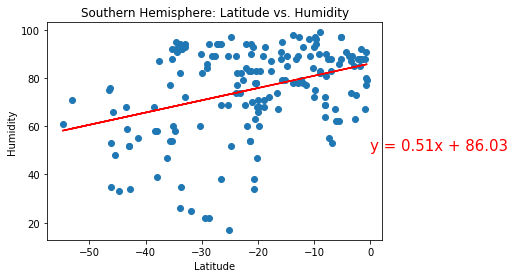

In [21]:
correlation = st.pearsonr(south_lat, south_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere: Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/south_humidity.png", dpi=150)
plt.show()

### Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression
There is a weak postive correlation between latitude and cloudiness. 

The r-value is 0.33


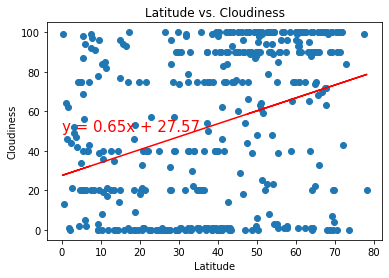

In [22]:
correlation = st.pearsonr(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_cloud.png", dpi=150)
plt.show()

### Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 
There is a weak postive correlation between latitude and cloudiness regardless of hemisphere. 

The r-value is 0.36


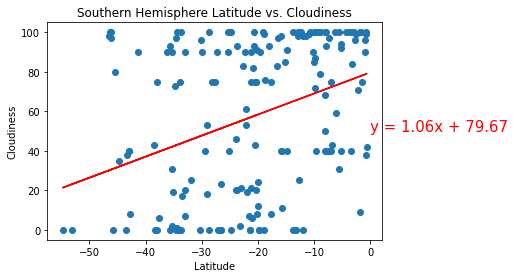

In [23]:
correlation = st.pearsonr(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/south_cloud.png", dpi=150)
plt.show()

### Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 
There is no correlation between hemisphere and wind speed in the northern hemisphere. 

The r-value is 0.01


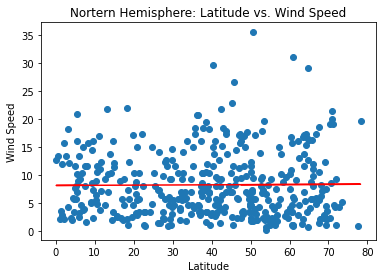

In [24]:
correlation = st.pearsonr(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Nortern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.savefig("output_data/north_wind.png", dpi=150)
plt.show()

### Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 
There a slightly weak negative correlation between windspeed and latitude in the southern hemisphere. 

The r-value is -0.2


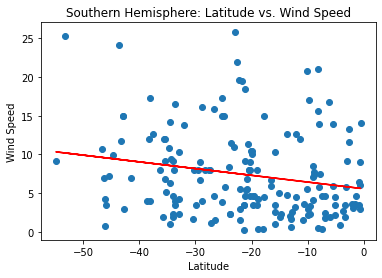

In [25]:
correlation = st.pearsonr(south_lat, south_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")

plt.savefig("output_data/south_wind.png", dpi=150)
plt.show()


In [27]:
weather_df.to_csv("output_data/cities.csv", index=False, header=True)